# Proyecto de clustering de Análisis de la personalidad del cliente

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

## Carga de datos

In [2]:
#df_country = pd.read_csv('/content/Country-data.csv')
df_country = pd.read_csv('/content/marketing_campaign.csv')

In [4]:
#Resumen estadistico
df_country.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df_country.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df_country.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

## Manejando valores nulos

In [8]:
#Verificar Valores nulos
df_country.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
#Eliminar valores nulos
df_country.dropna(axis=0, inplace=True)

In [10]:
df_country.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Validando duplicados

In [11]:
df_country[df_country.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [12]:
#lista de columnas excepto las tipo object
int_cols = df_country.select_dtypes(exclude='object').columns
int_cols

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

## Análisis de distribución

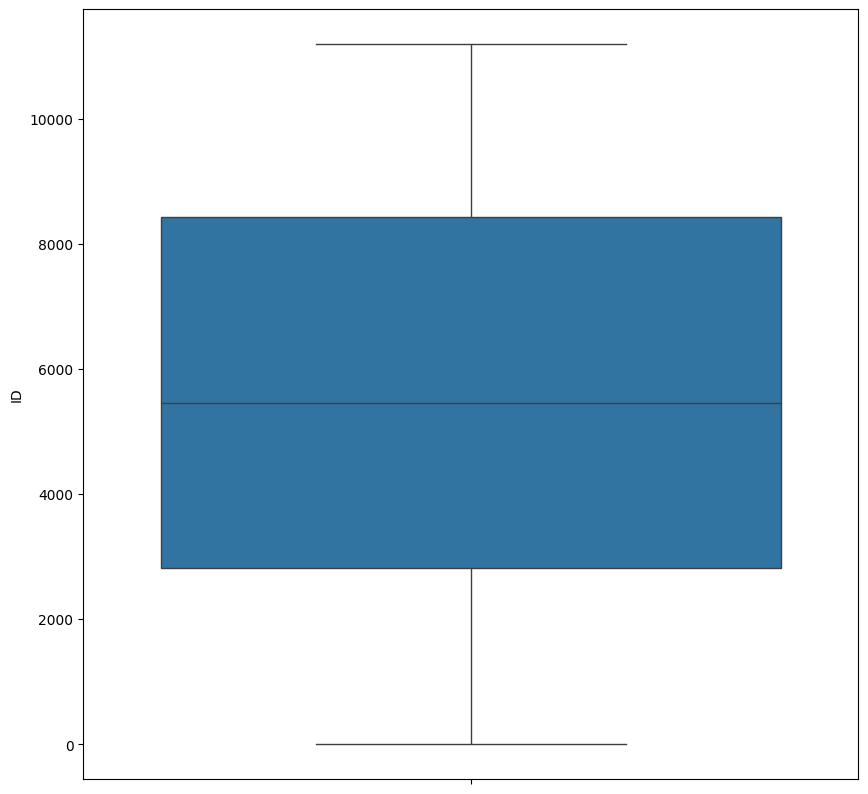

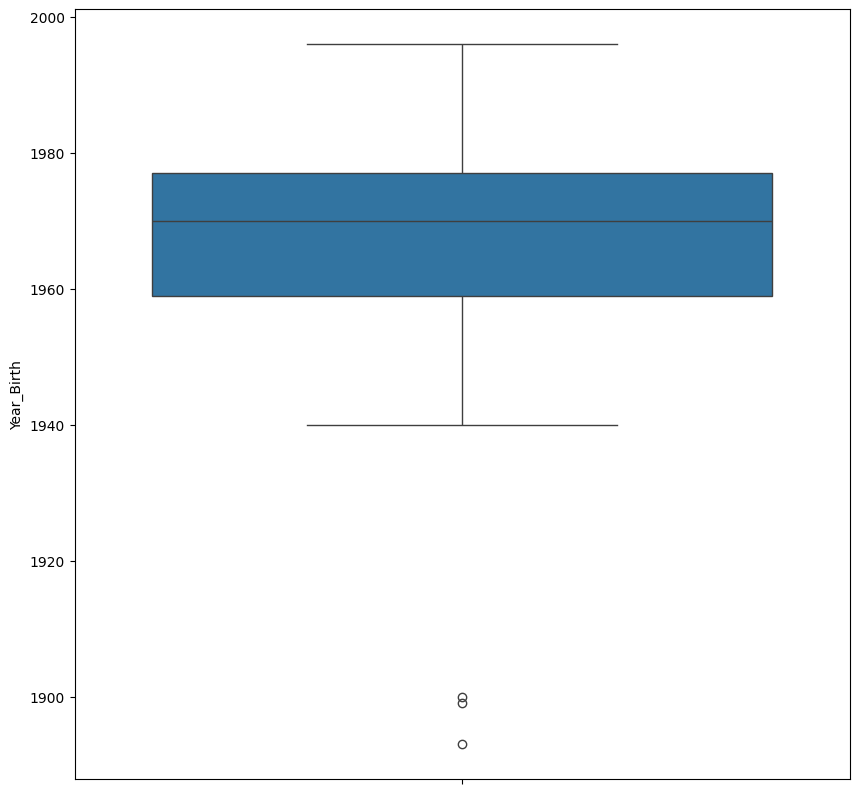

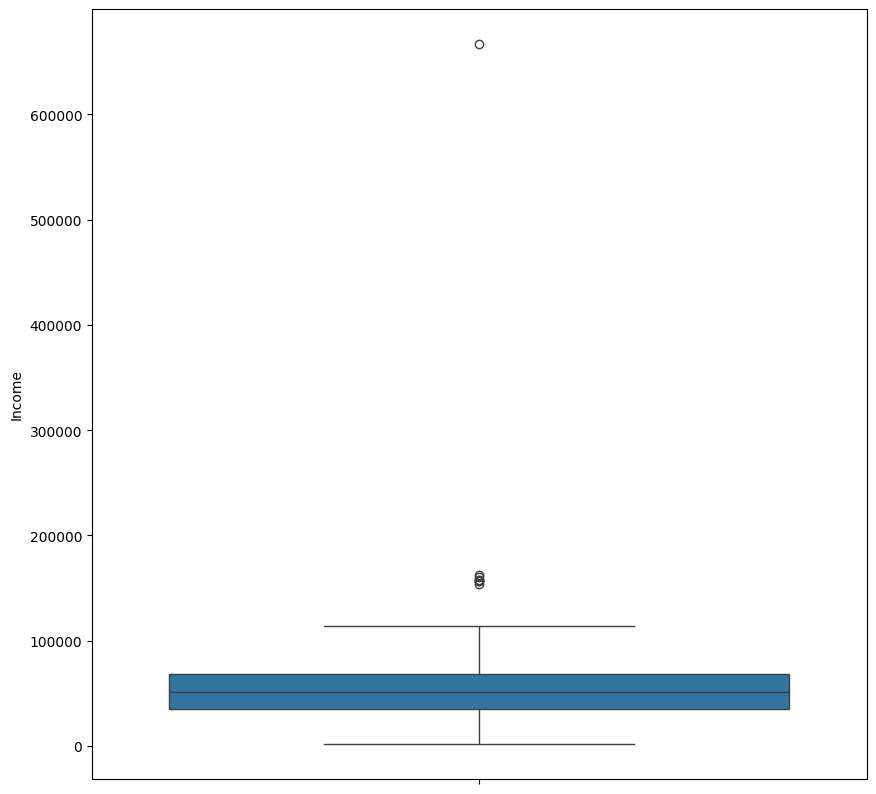

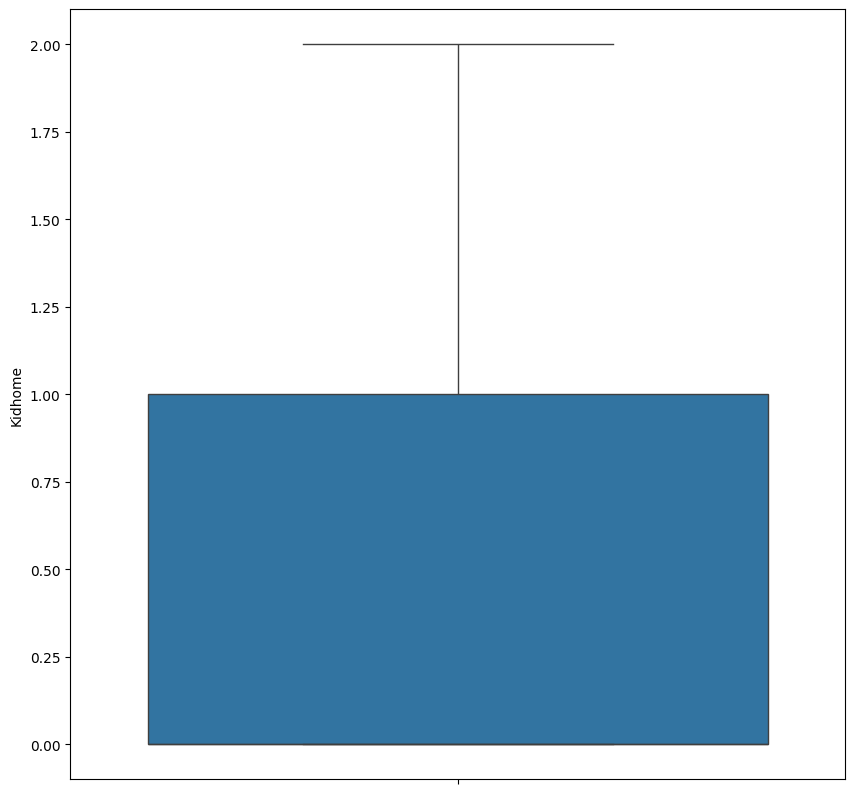

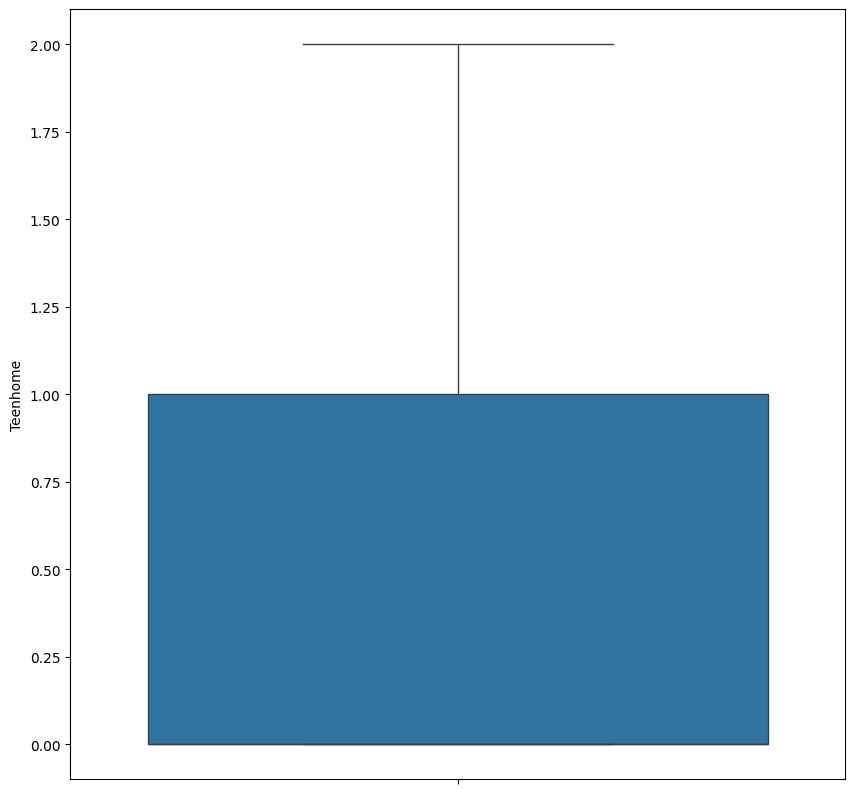

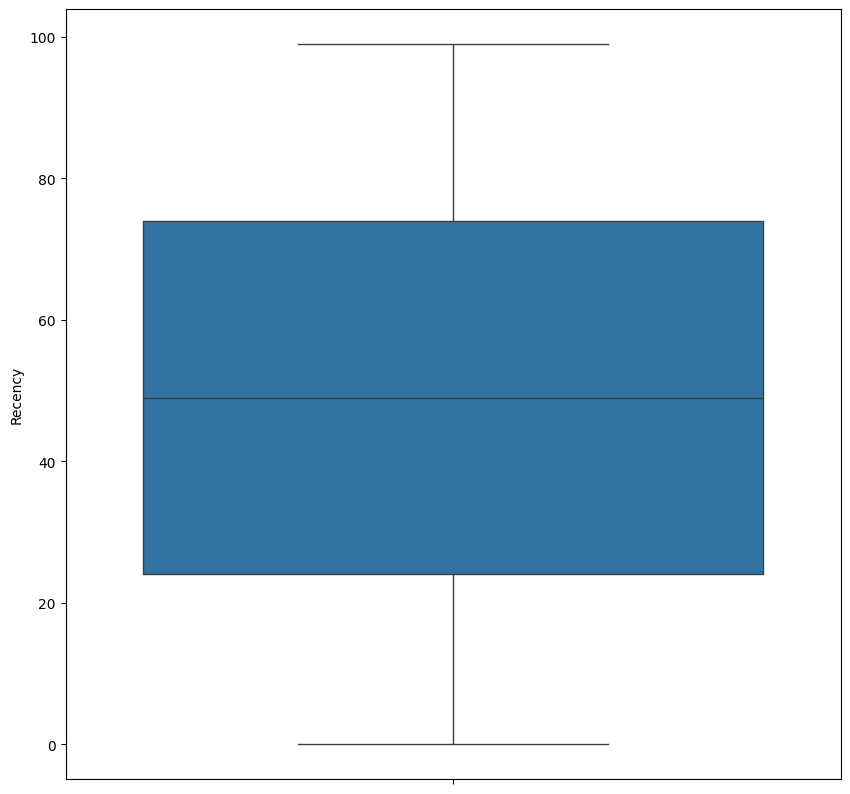

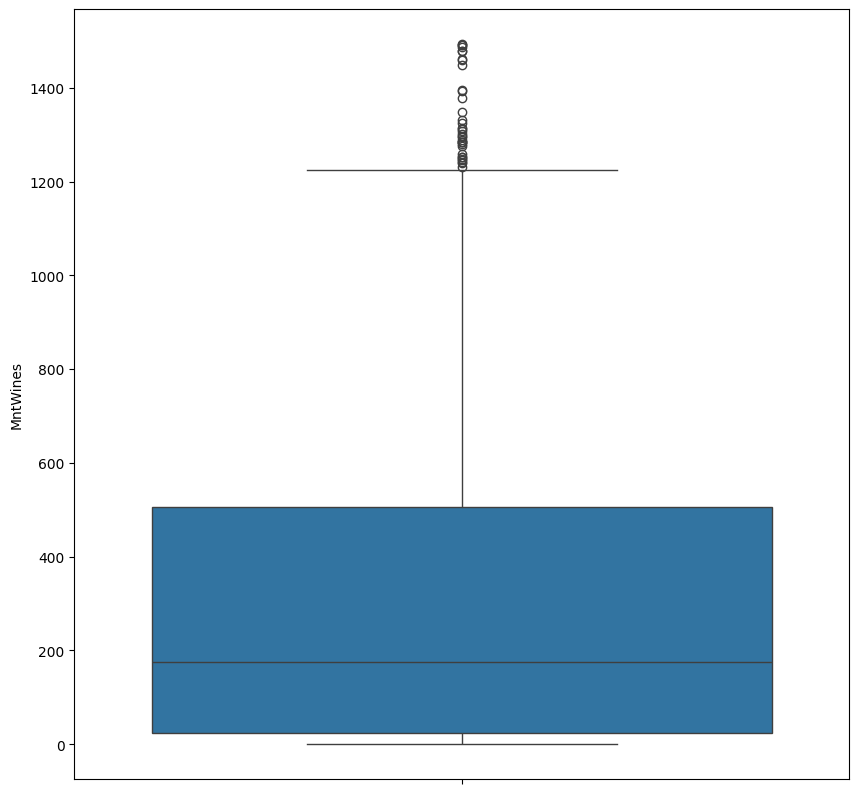

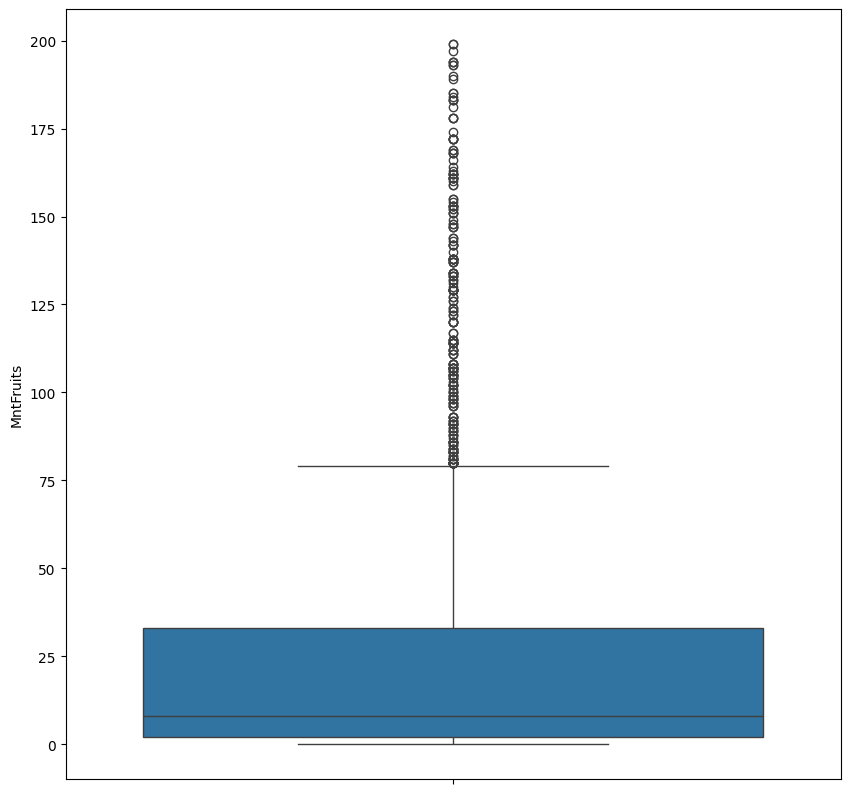

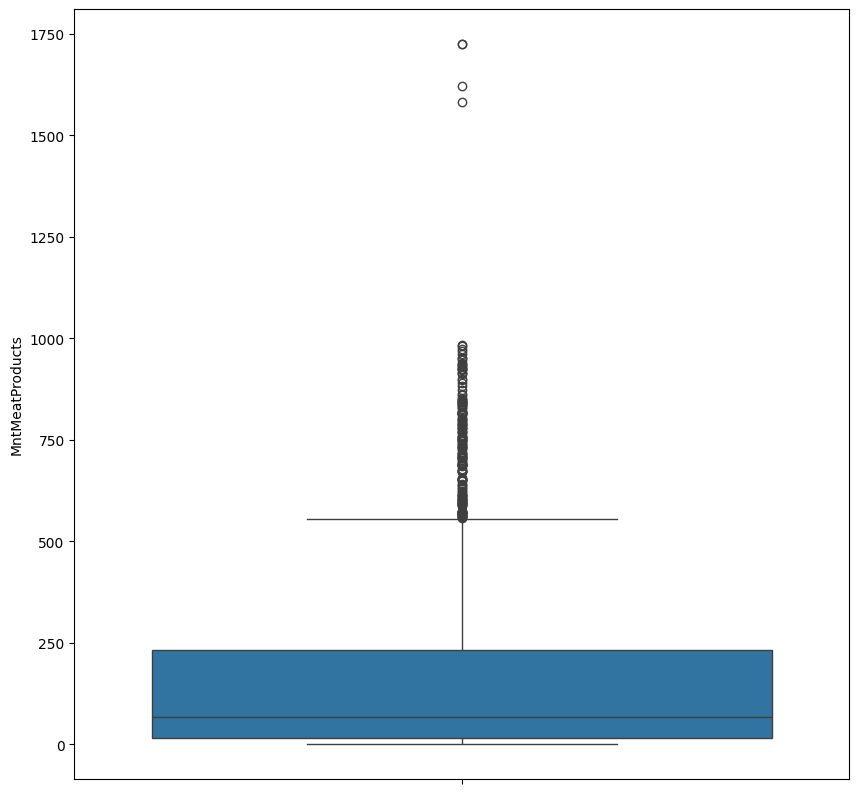

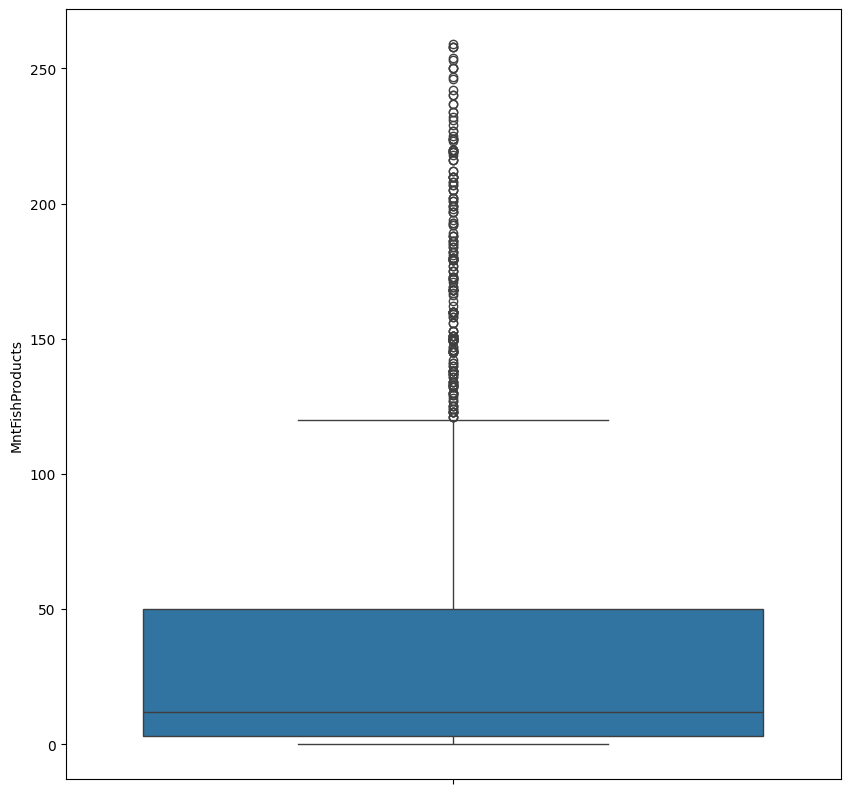

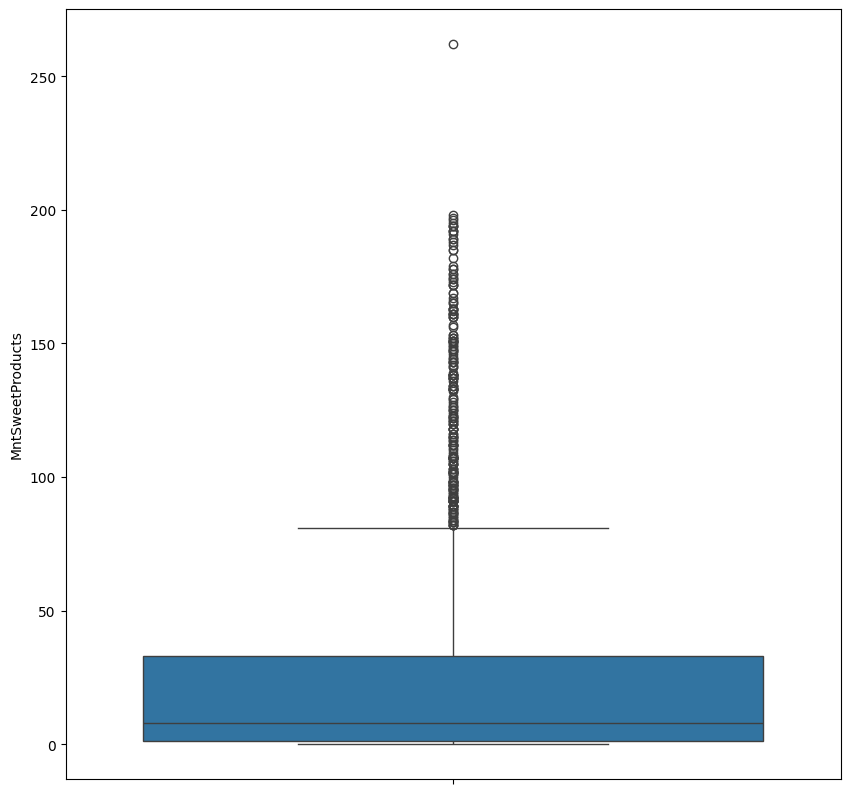

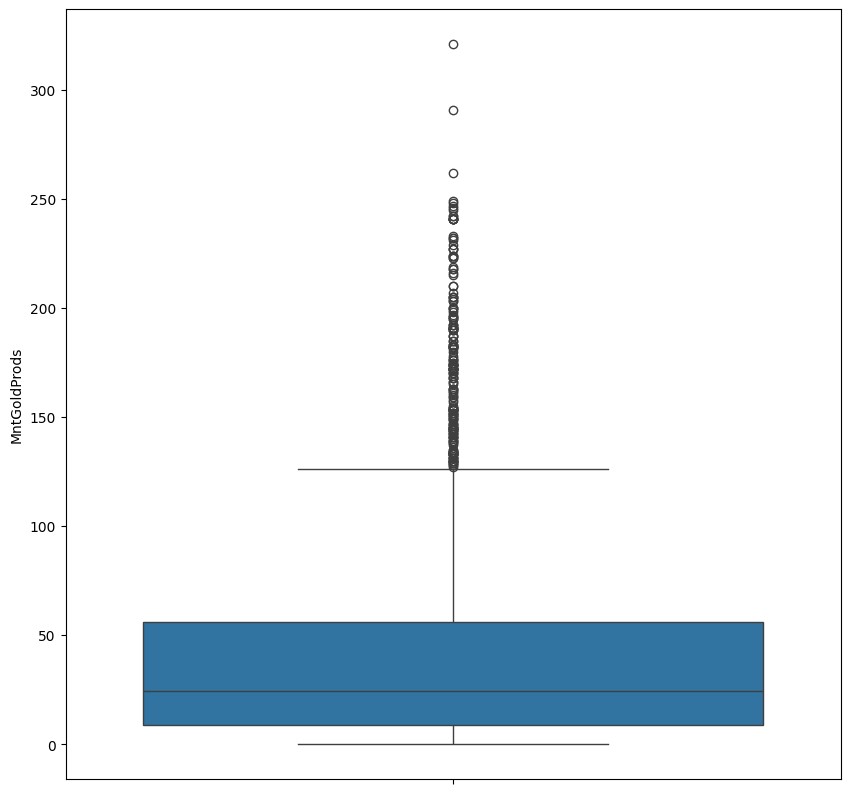

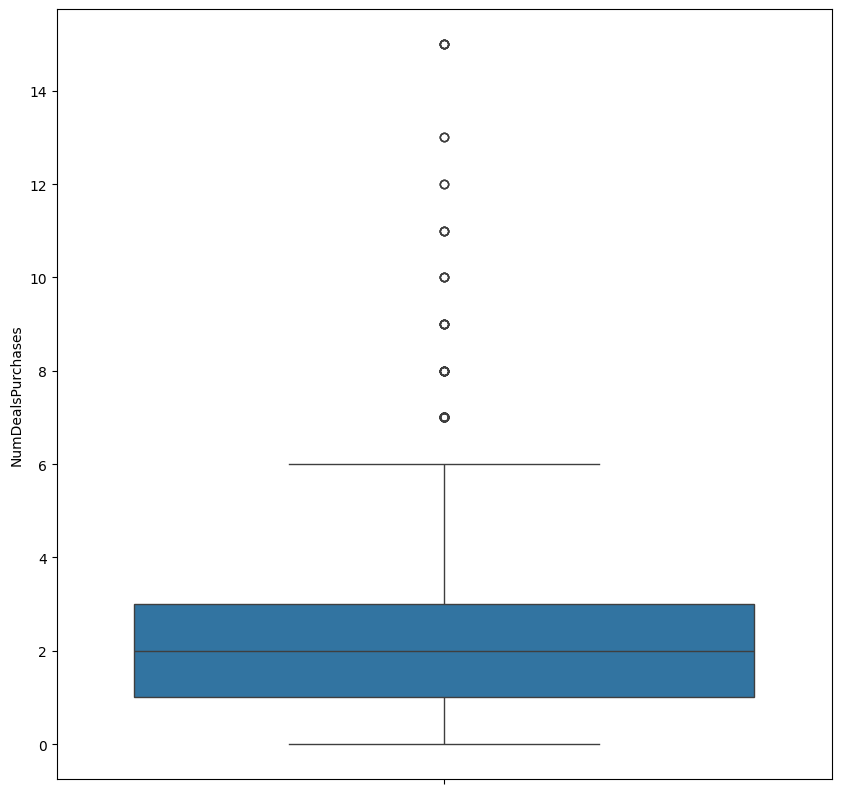

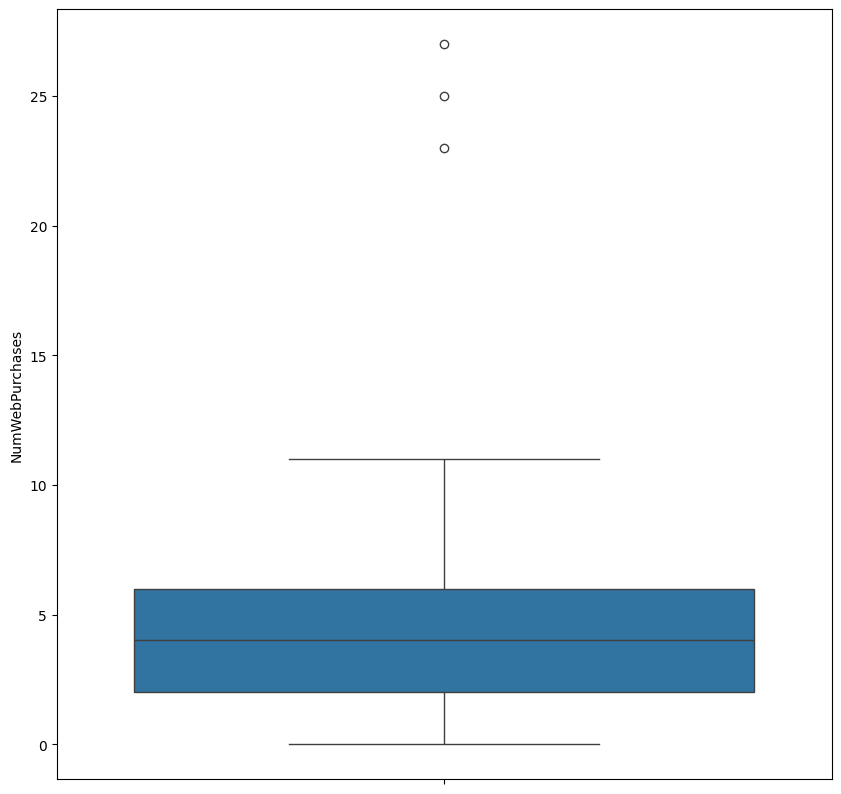

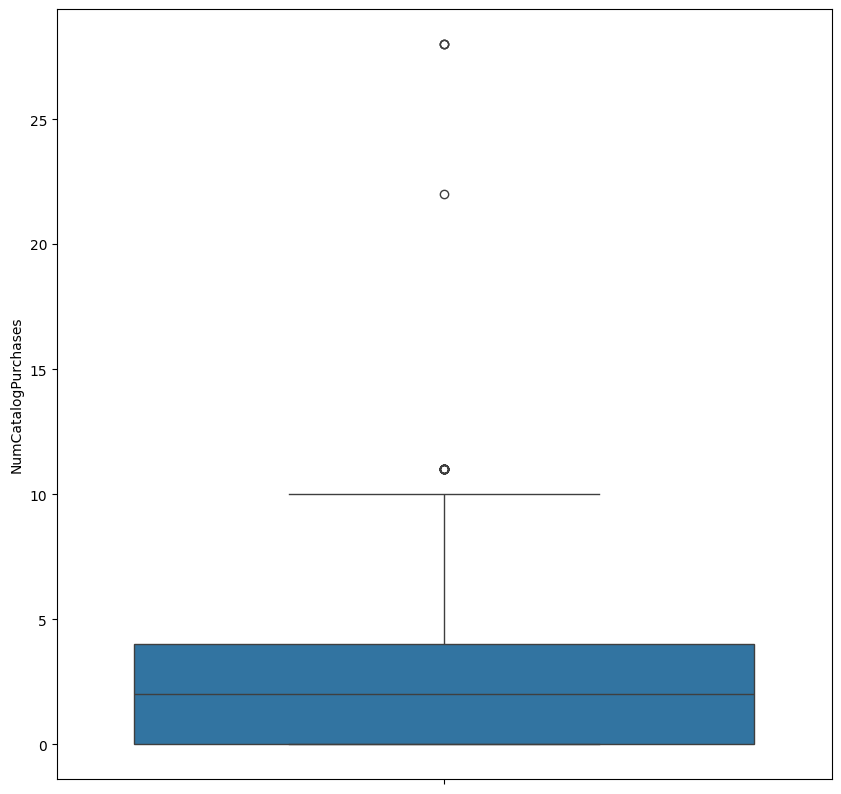

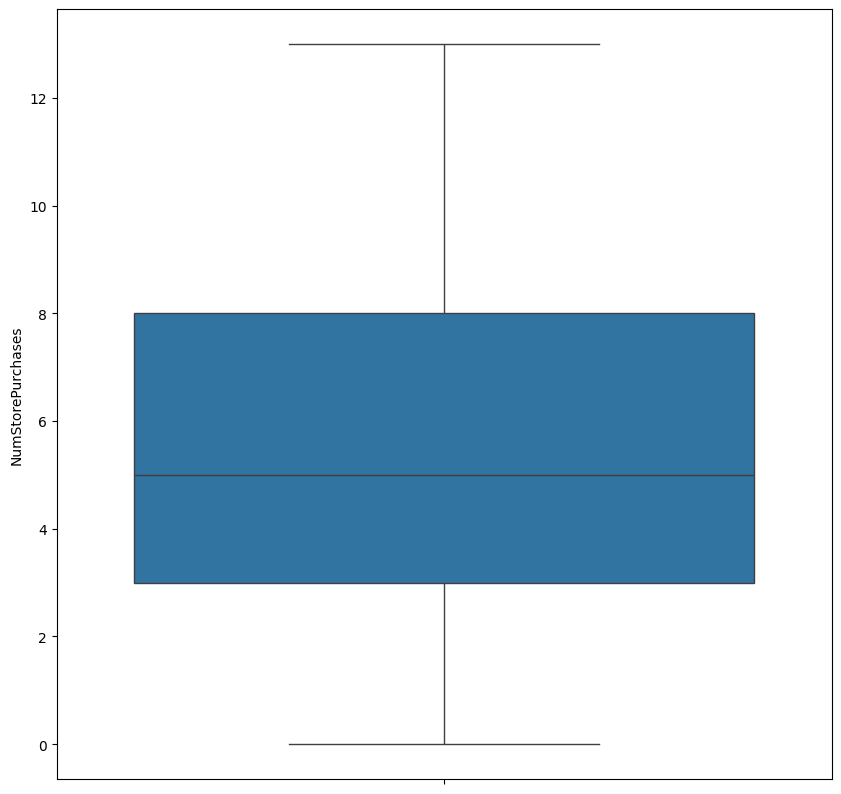

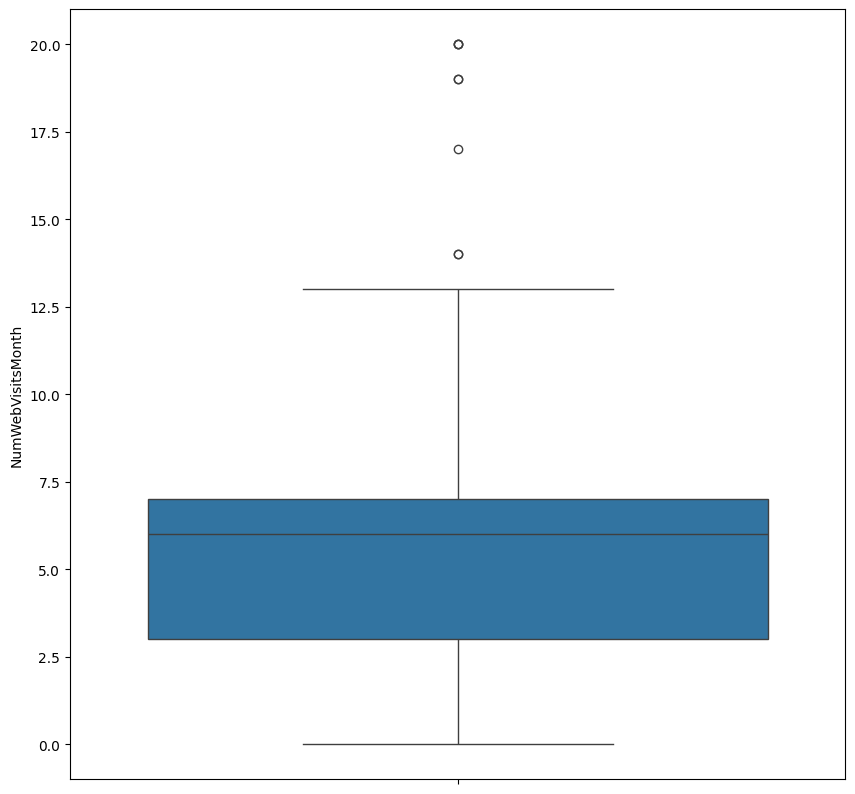

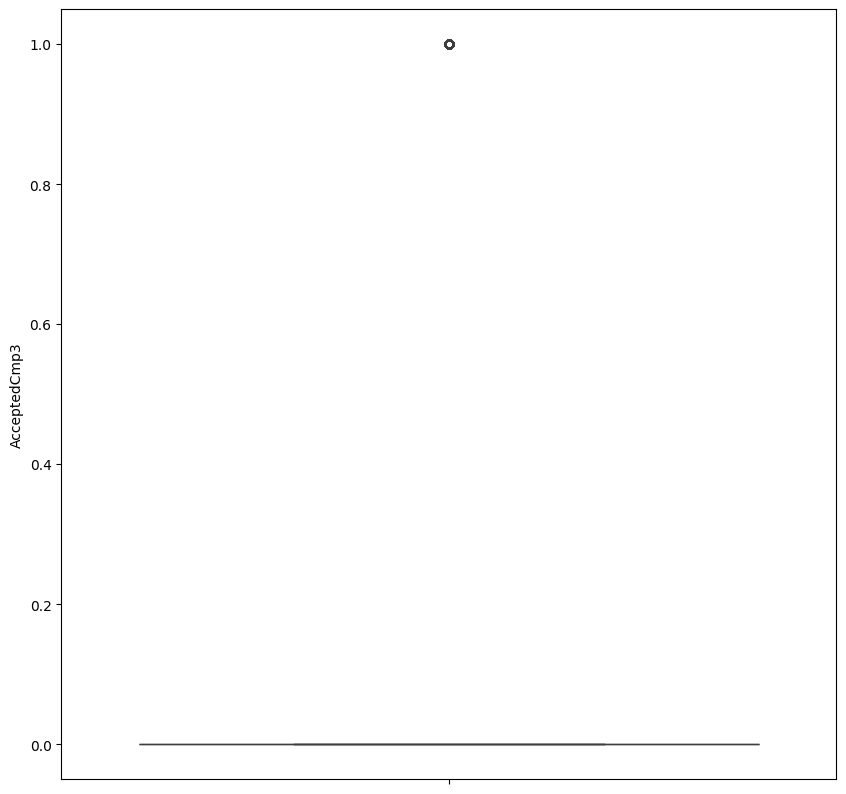

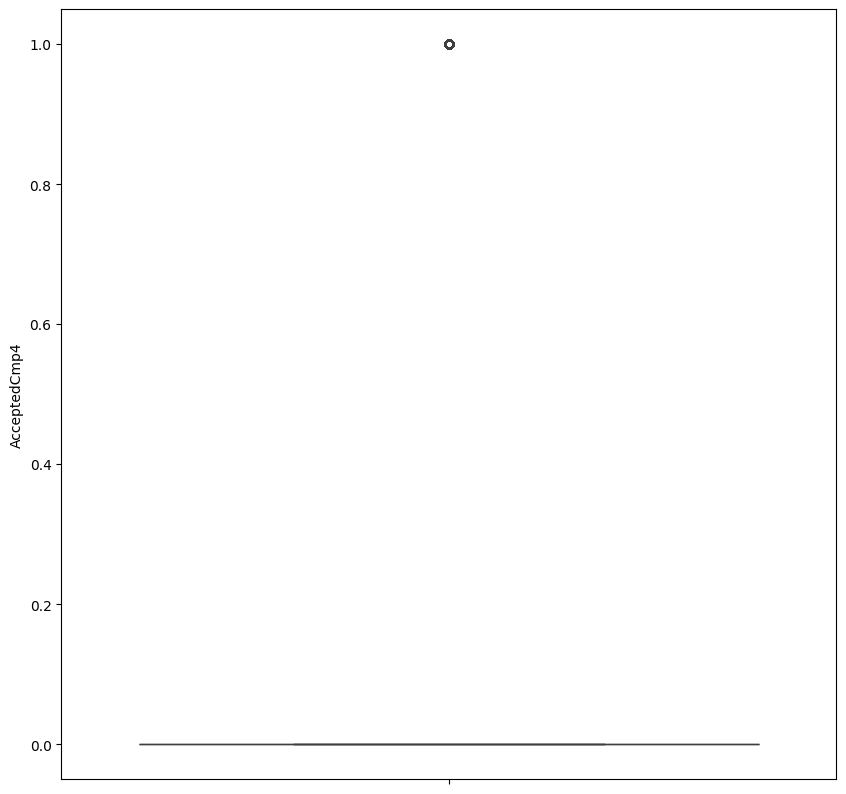

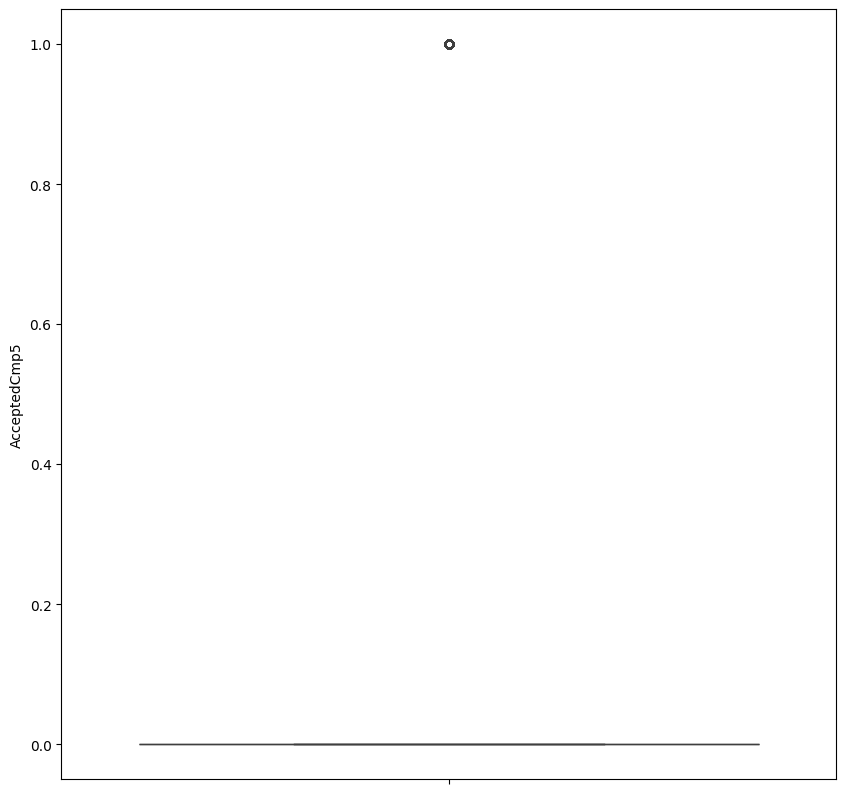

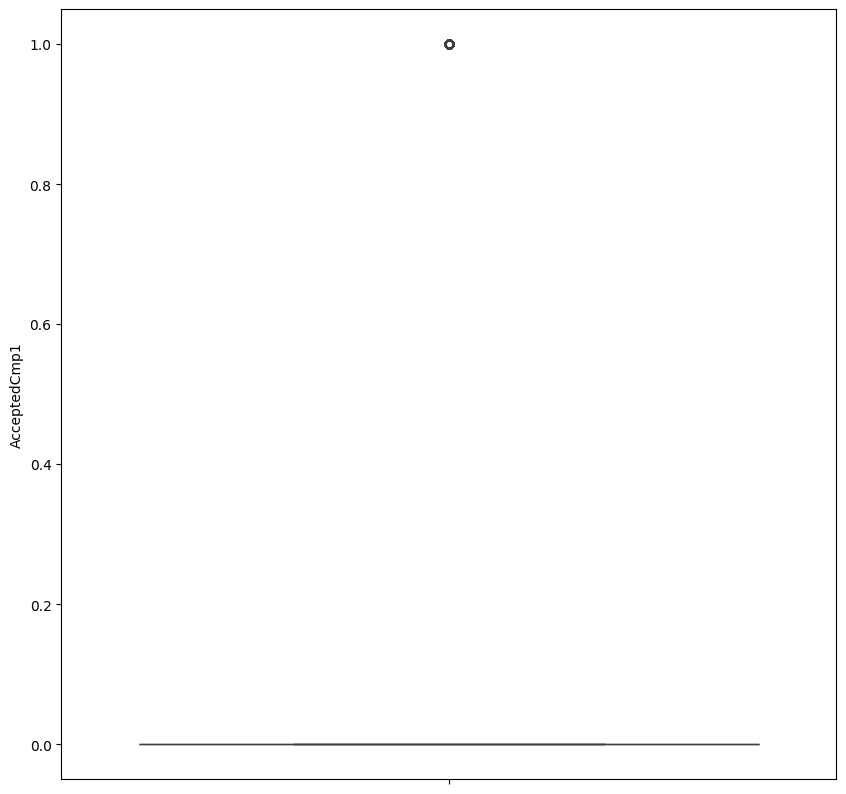

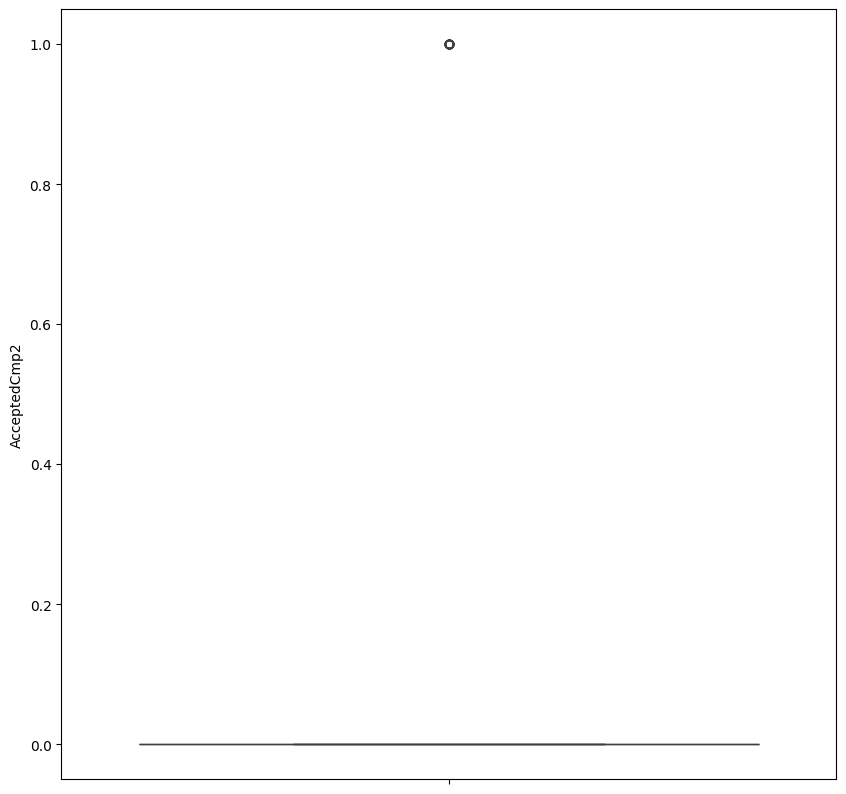

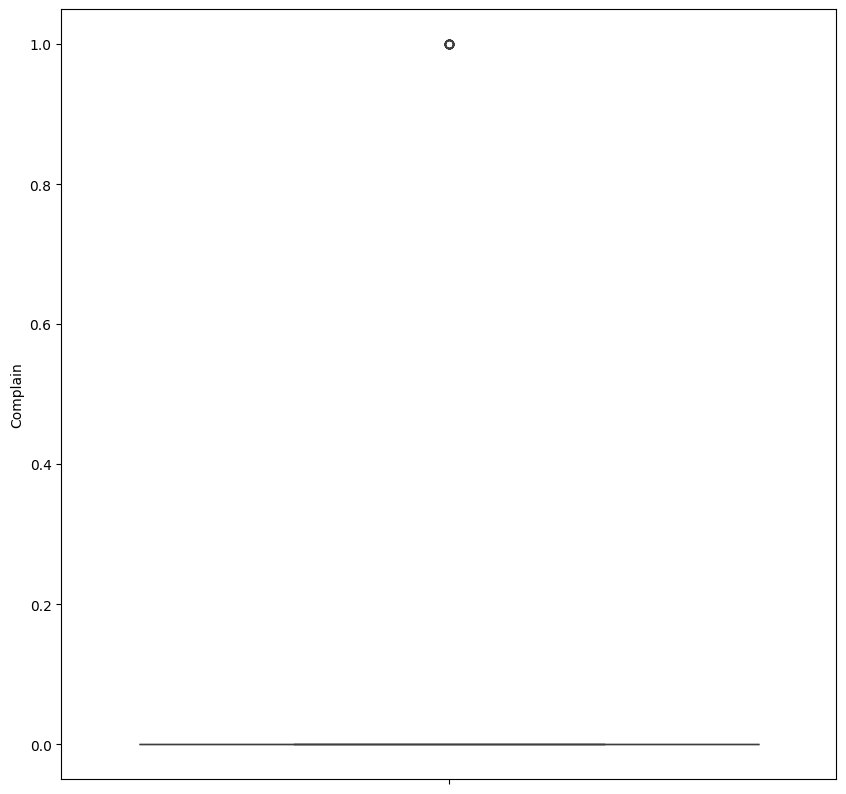

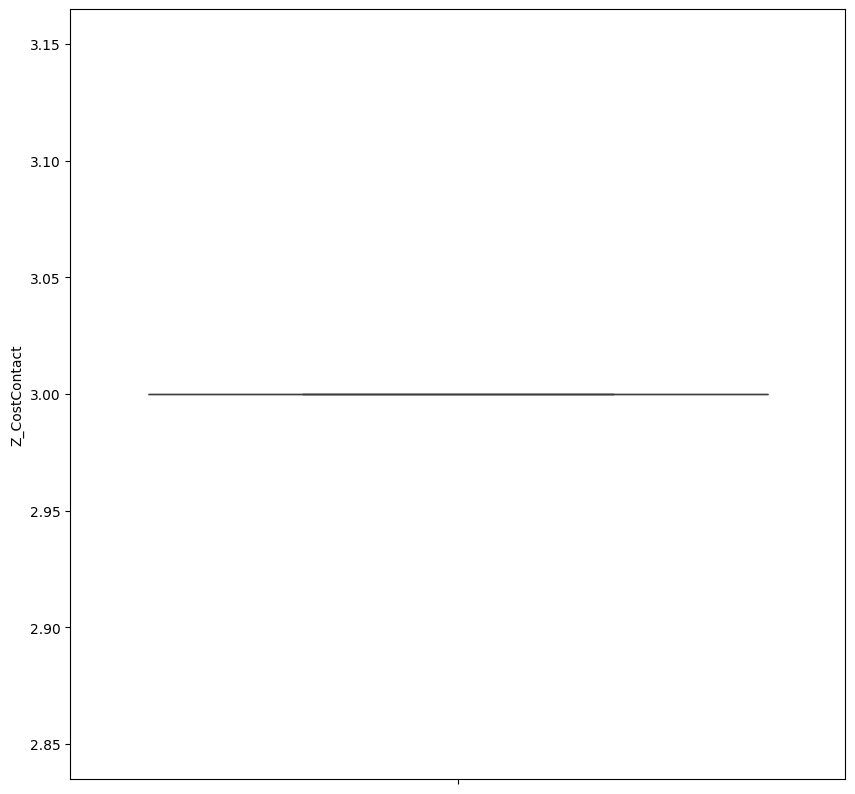

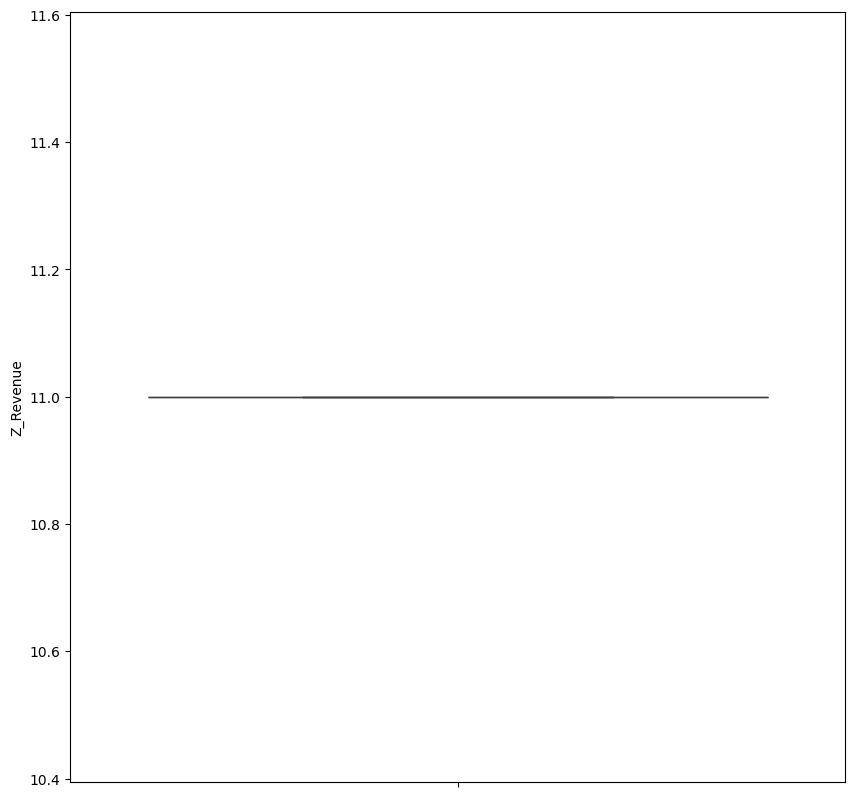

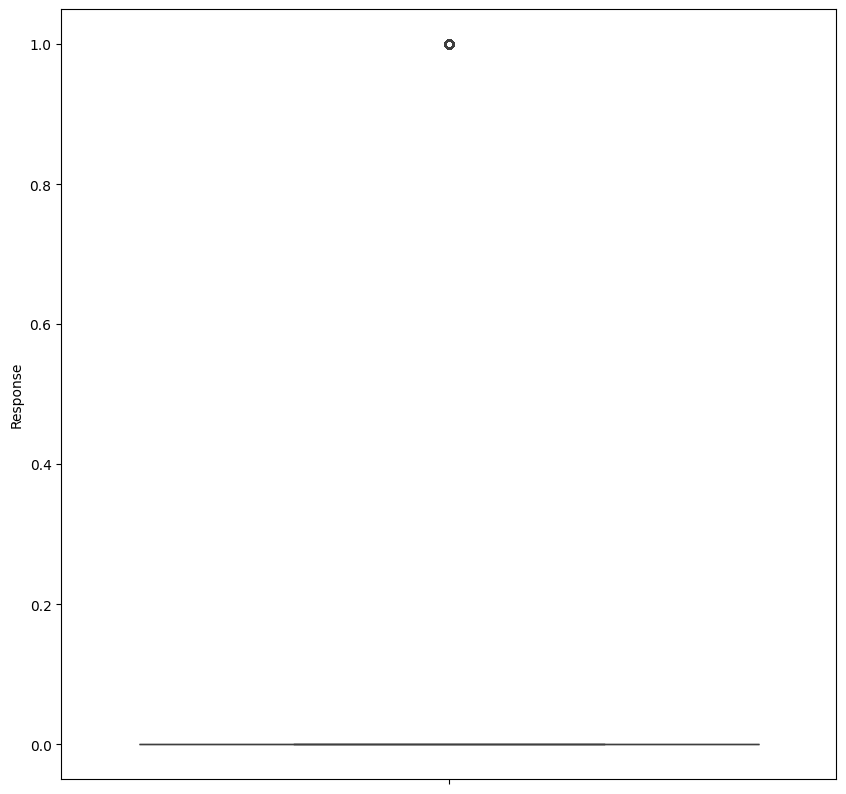

In [13]:
#Graficas para visualizar outliers(valor atipico) en las variables numericas
int_cols = df_country.select_dtypes(exclude='object').columns
for _ in int_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df_country, y= _)
    plt.show()

In [14]:
df_country.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [15]:
#Remover variables que no aportan nada segun graficasde caja, ademas eliminamos la columna 'ID'
variables_to_remove = ['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact','Z_Revenue', 'Response']
if all(var in df_country.columns for var in variables_to_remove):
    df_country = df_country.drop(variables_to_remove, axis=1)

In [16]:
df_country.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
dtype: object

In [17]:
df_country.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118,46,27,15,5,5,3,6,5


In [18]:
#Para poder graficar la coorelacion las variables tipo object se eliminar y se guardan en otra variable o dataframe
variables_a_eliminar = ['Education', 'Marital_Status', 'Dt_Customer']
# Crear un nuevo DataFrame para almacenar las variables eliminadas
df_elim = df_country[variables_a_eliminar].copy()
# Eliminar las variables del DataFrame original
df_country.drop(columns=variables_a_eliminar, inplace=True)

In [20]:
#Variables eliminadas del dataframe df_country
df_elim.head(5)

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,4/09/2012
1,Graduation,Single,8/03/2014
2,Graduation,Together,21/08/2013
3,Graduation,Together,10/02/2014
4,PhD,Married,19/01/2014


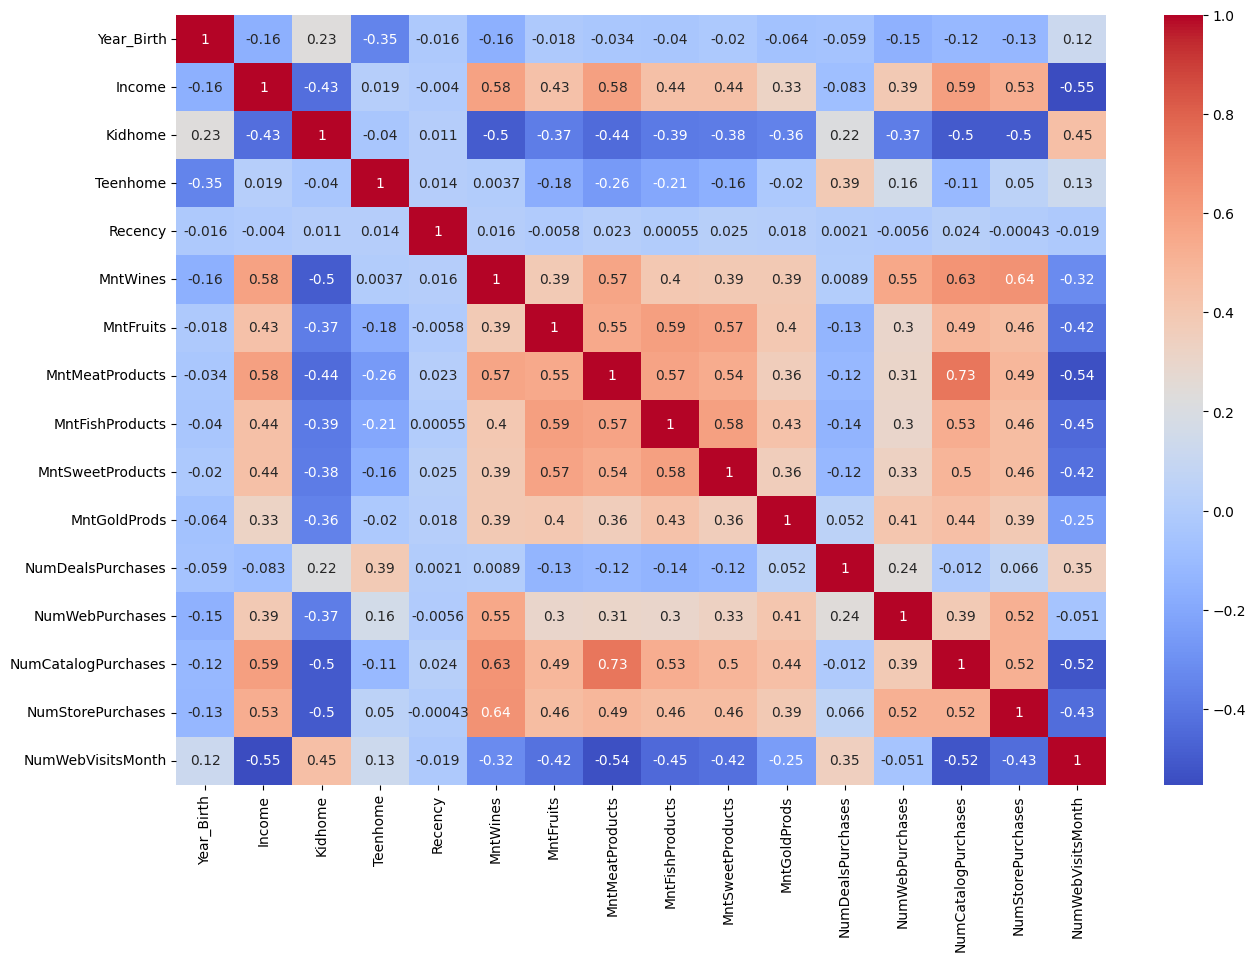

In [21]:
#Grafica de coorelaciones
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_country.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df_country.head(5)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


## Escalar datos

In [22]:
from sklearn.preprocessing import StandardScaler
scaaler = StandardScaler()
#df_country_scaled = scaaler.fit_transform(df_country.drop('country',axis=1))
df_country_scaled = scaaler.fit_transform(df_country)

In [23]:
df_country_scaled

array([[-0.98644293,  0.2340627 , -0.82303932, ...,  2.50471216,
        -0.55414289,  0.69323197],
       [-1.23680074, -0.23455948,  1.03993835, ..., -0.57108239,
        -1.16951781, -0.1315745 ],
       [-0.31882209,  0.76947764, -0.82303932, ..., -0.22932744,
         1.29198186, -0.54397773],
       ...,
       [ 1.01641959,  0.18809052, -0.82303932, ...,  0.11242751,
         2.21504423,  0.28082874],
       [-1.06989553,  0.67538765, -0.82303932, ...,  0.79593741,
         1.29198186, -0.95638097],
       [-1.23680074,  0.02470453,  1.03993835, ..., -0.57108239,
        -0.55414289,  0.69323197]])

In [24]:
#Convertir nuevamente a un dataframe
#df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.drop('country',axis=1).columns )
df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.columns)

In [25]:
df_country_scaled.head(5)
#Se puede ver ahora los datos escalados

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574


In [26]:
#Vemos que el dataframe original le faltan las variable tipo object eliminadas
df_country.head(5)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [27]:
# Concatenar los DataFrames con las variable tipo object eliminadas
df_country = pd.concat([df_elim, df_country], axis=1)

In [28]:
#dataframe original sin las variables que se eliminaron despues de los graficos de cajas
df_country.head(5)

,Education,Marital_Status,Dt_Customer,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Graduation,Single,4/09/2012,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,Graduation,Single,8/03/2014,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,Graduation,Together,21/08/2013,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,Graduation,Together,10/02/2014,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,PhD,Married,19/01/2014,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


## PCA  Análisis de componentes principales

#Reduccion de dimesionalidad

https://mlplaygrounds.com/machine/learning/PCA.html

PCA - Reduccion de dimesionalidad.

Tomar todas las dimensiones que se encuentran en un dataset y reducirlas sin perder la varianza de los datos o sea eliminar distintas variable(features)

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[ 3.82665846, -0.04918478, -1.22879511, ..., -0.12124038,
        -0.49350876,  0.37712358],
       [-2.29729931,  0.20917184,  1.54883679, ..., -0.1983818 ,
        -0.10944821, -0.02239912],
       [ 1.89073873, -0.19450148,  0.11275022, ...,  0.0807361 ,
        -0.18692808,  0.07401113],
       ...,
       [ 1.31238188, -0.71604633, -0.21511396, ...,  0.86668402,
         0.05768678,  0.21962378],
       [ 2.05025751,  1.05558592,  1.11800583, ..., -0.38396082,
        -0.01862634,  0.427428  ],
       [-1.88408745,  1.07564068,  0.76115634, ...,  0.06393638,
         0.30494618,  0.26690442]])

In [31]:
#Para saber cuantas de las dimensiones anteriores vamos a necesitar calculamos el indice de varianza
var = pca.explained_variance_ratio_
print(var)

[0.3805047  0.12195741 0.07688024 0.06280423 0.05171925 0.047818
 0.04015145 0.03851899 0.03051624 0.02811233 0.02647273 0.02436368
 0.02226132 0.01908923 0.01530498 0.01352522]


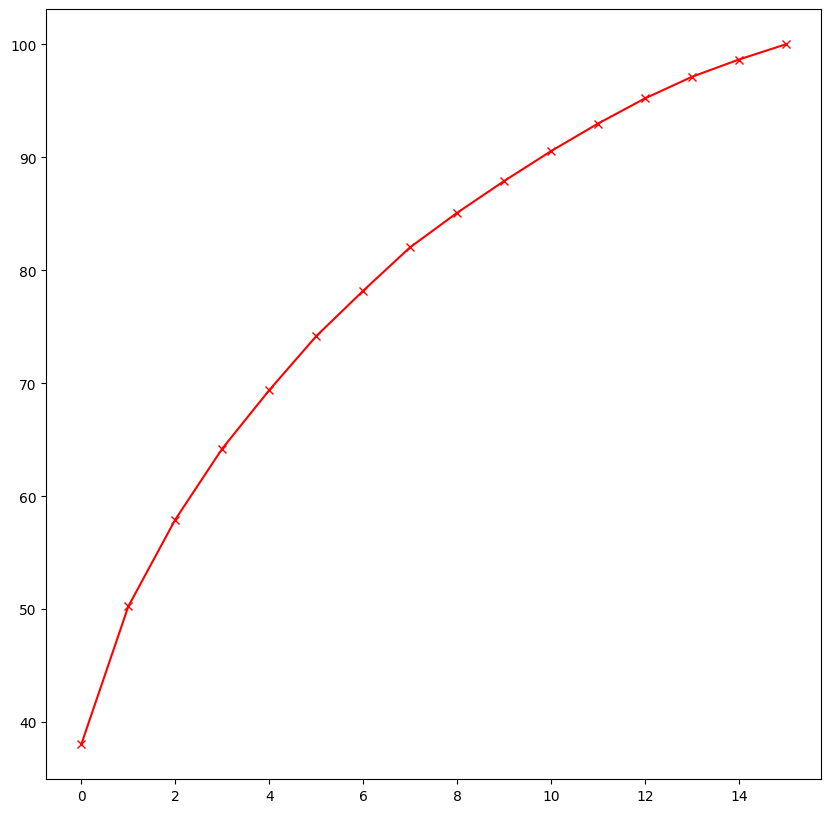

In [32]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)  #Acumulado de la varianza
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [37]:
#Segun la grafica solo utilizaremos 10 variables la 0,1,2,3,4,5,6,7,8,9 con las cuales tenemos casi el 93% de los datos del dataframe
#Se borran las columnas 10,11,12,13,14,15 para reducir la dimensionalidad.
pca_data_standard = pd.DataFrame(pca_data_scaled)    #convertir nuevamente a dataframe
pca_data_standard.drop([10,11,12,13,14,15],axis=1, inplace=True)

In [38]:
pca_data_standard

,0,1,2,3,4,5,6,7,8,9
0,3.826658,-0.049185,-1.228795,0.441229,-1.115027,0.135069,1.252180,-2.190125,-0.777679,1.102655
1,-2.297299,0.209172,1.548837,-0.285505,-0.561470,0.997657,0.432853,-0.109456,0.481452,0.164615
2,1.890739,-0.194501,0.112750,-1.015716,-0.048053,-0.963573,-0.804399,-0.487322,0.623677,-0.969123
3,-2.472100,-1.380797,-0.804984,-0.765154,0.340662,0.066764,-0.213559,0.169412,-0.023655,-0.369768
4,-0.286083,-0.268196,-1.561351,1.623660,0.480227,1.042447,-0.394190,-0.077773,0.181767,-0.480647
...,...,...,...,...,...,...,...,...,...,...
2211,2.695445,1.375420,-1.063914,-0.015910,-1.874170,-1.845059,0.998765,1.148054,1.140757,1.851731
2212,-1.551952,3.168381,-0.587628,0.433330,0.286101,2.005038,0.470710,-1.495266,1.834004,-0.467453
2213,1.312382,-0.716046,-0.215114,1.238866,1.733617,-1.087998,-1.028541,0.083231,-0.514223,-1.706736
2214,2.050258,1.055586,1.118006,-1.479285,-0.226264,0.101885,-0.079906,0.287691,-0.028615,-0.410216


## Importar librerías para clustering

In [39]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-means

### PCA

In [40]:
#Hacemos este codigo para encontrar K y las dos graficas siguientes para ubicar K
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

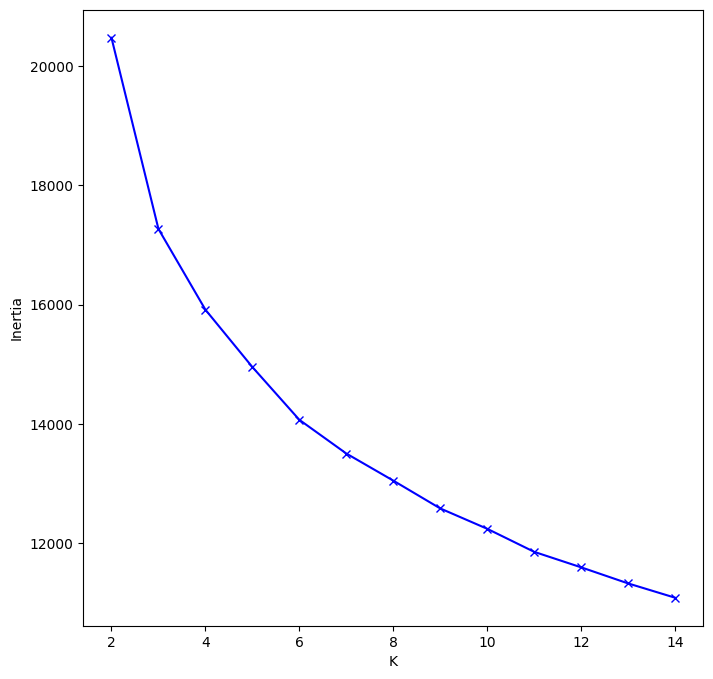

In [42]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

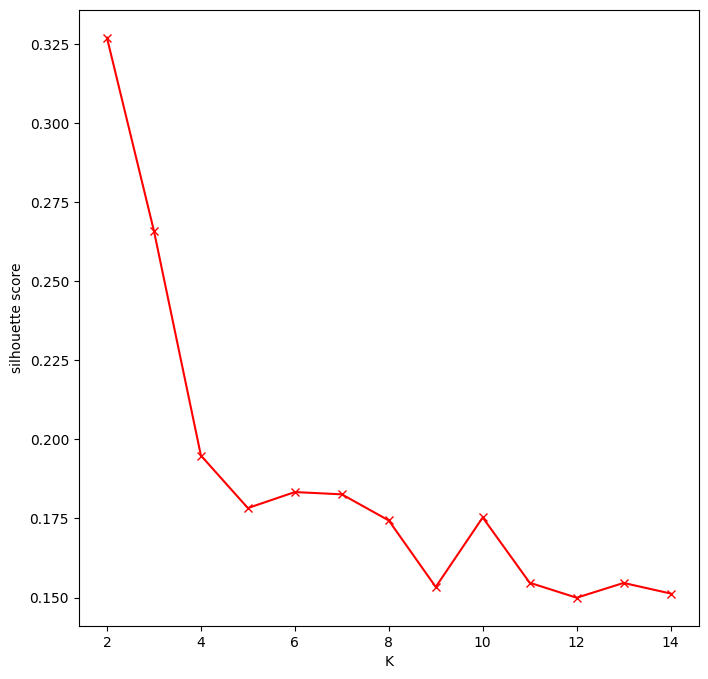

In [43]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [44]:
km = KMeans(n_clusters = 2)    #Escojimos K=2
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))  #Imprimimos indice de silueta
df_country['k_means_pca'] = y  #Agregamos una columna nueva al dataframe df_country con valores de y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.326957134404302


In [45]:
df_country.head(5)

,Education,Marital_Status,Dt_Customer,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,k_means_pca
0,Graduation,Single,4/09/2012,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1
1,Graduation,Single,8/03/2014,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0
2,Graduation,Together,21/08/2013,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,1
3,Graduation,Together,10/02/2014,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0
4,PhD,Married,19/01/2014,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0


### Sin PCA

In [46]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_country_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled,y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

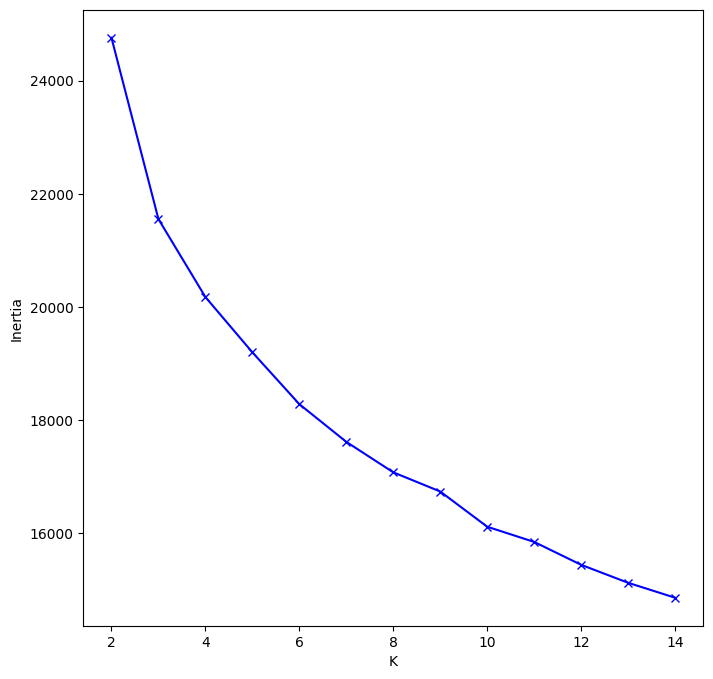

In [47]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

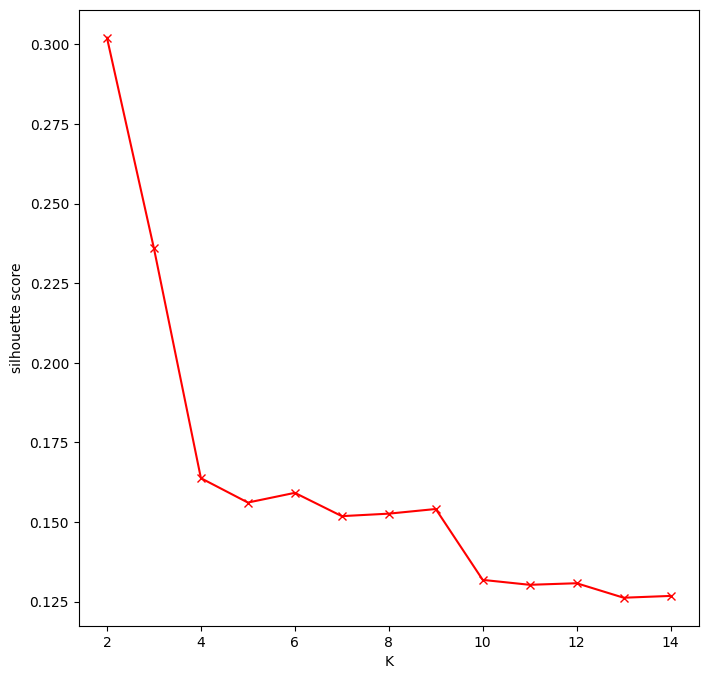

In [48]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [49]:
km = KMeans(n_clusters = 2)
y = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means'] = y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.30198887629271154


Explicacion codigo anterior: df_country['k_means'] = y

Se agrega una nueva columna llamada 'k_means' al DataFrame df_country, que contiene las etiquetas de clúster calculadas anteriormente y almacenadas en y. Esto permite asociar cada fila del DataFrame con su respectivo clúster según el modelo K-Means.

## Agglomerativen hierarchical clustering

### PCA

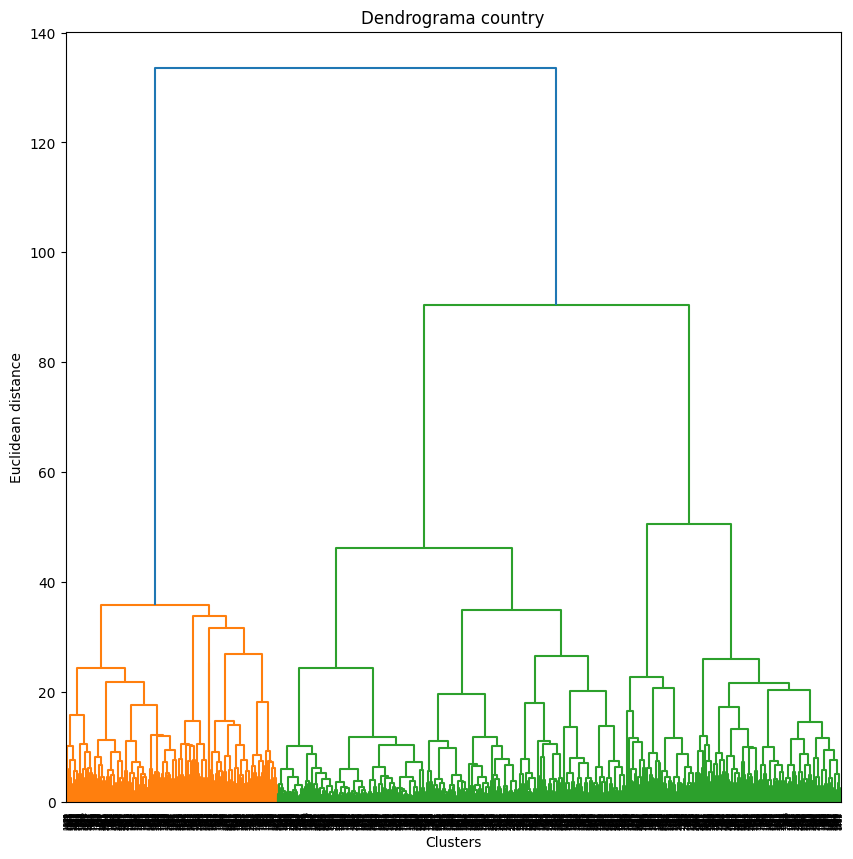

In [50]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))  #usamos el dataframe que se le aplico pca pca_data_standard
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [51]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  #utilizamos n_clusters=2 segun dendograma
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc )) #coheficiente de silueta
df_country['hc_pca'] = y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.3101658811122695


### Sin PCA

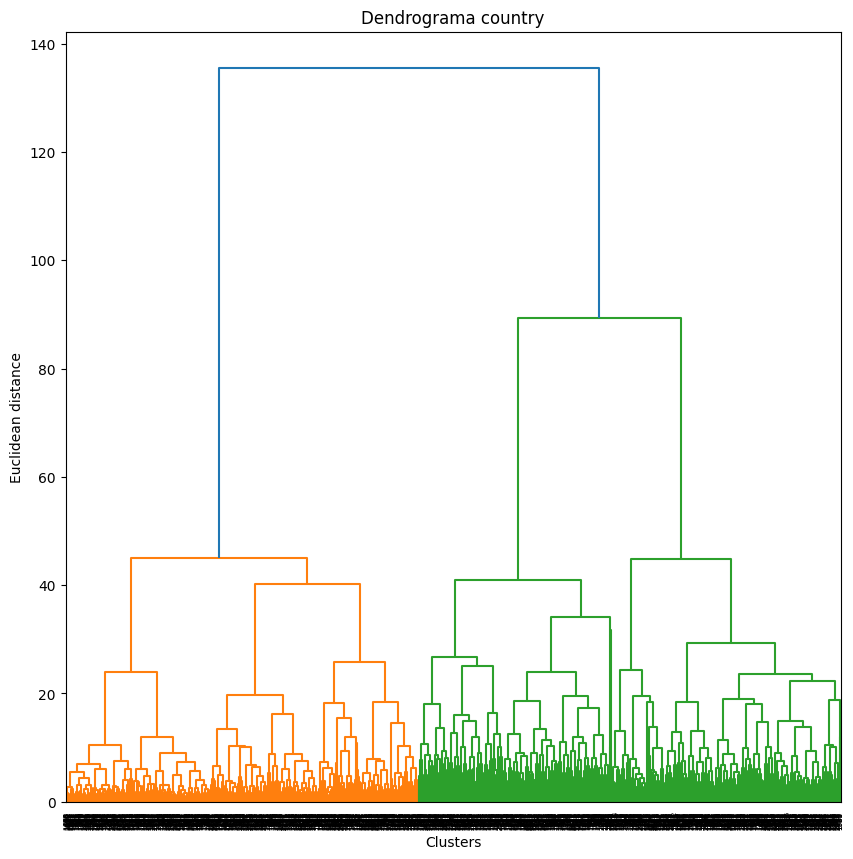

In [52]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))   #usamos el dataframe que no se le aplico pca df_country_scaled
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [53]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_hc ))
df_country['hc'] = y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.24326215386740085


## DBSCAN

### PCA

In [54]:
#Encontrar híper-parámetros
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)        #este numero se toma de las dos dimensiones y se multiplica por 2, y se toman valores entre 2 y 4
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

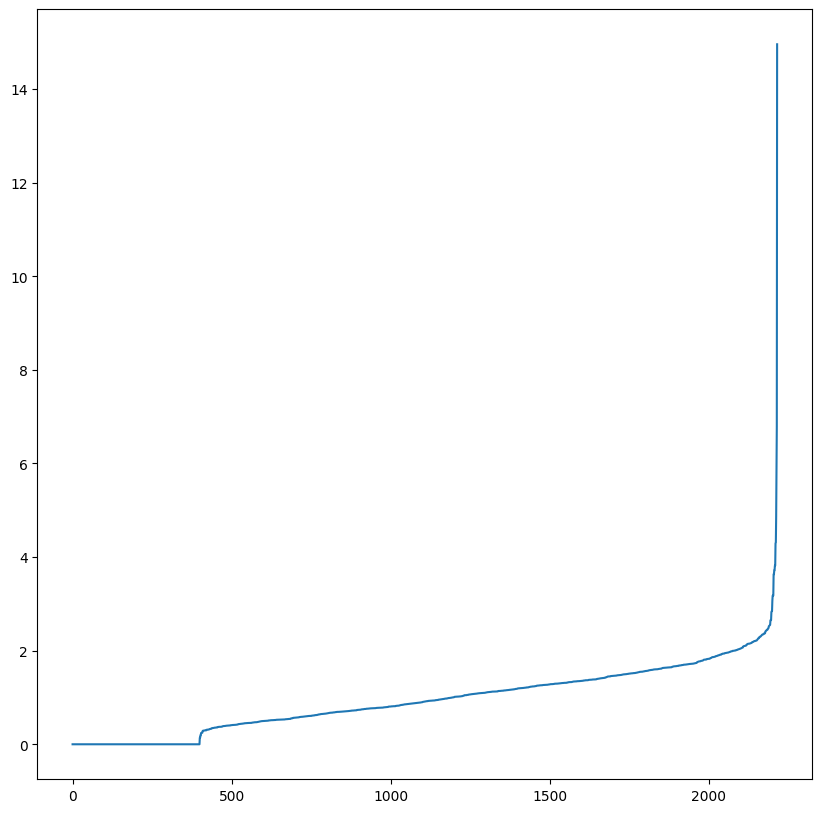

In [55]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [56]:
eps_values = np.arange(0.5, 2.5, 0.10) #El dato de 0.5 a 2.5 sale de la grafica de la rodilla anterior
min_samples = np.arange(3,12)    #número mínimo de puntos que deben estar dentro de un radio especificado(eps).
#La selección de min_samples puede ser un proceso de prueba y error
#En este ejemplo tengo 4 dimensiones o features(variables), segun esto escojo el rango min_samples

In [57]:
from itertools import product
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []                 #lista que va ha ser el numero de clusters
sil_score = []                      #lista que va ha ser el indice de silueta
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))


In [58]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [59]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

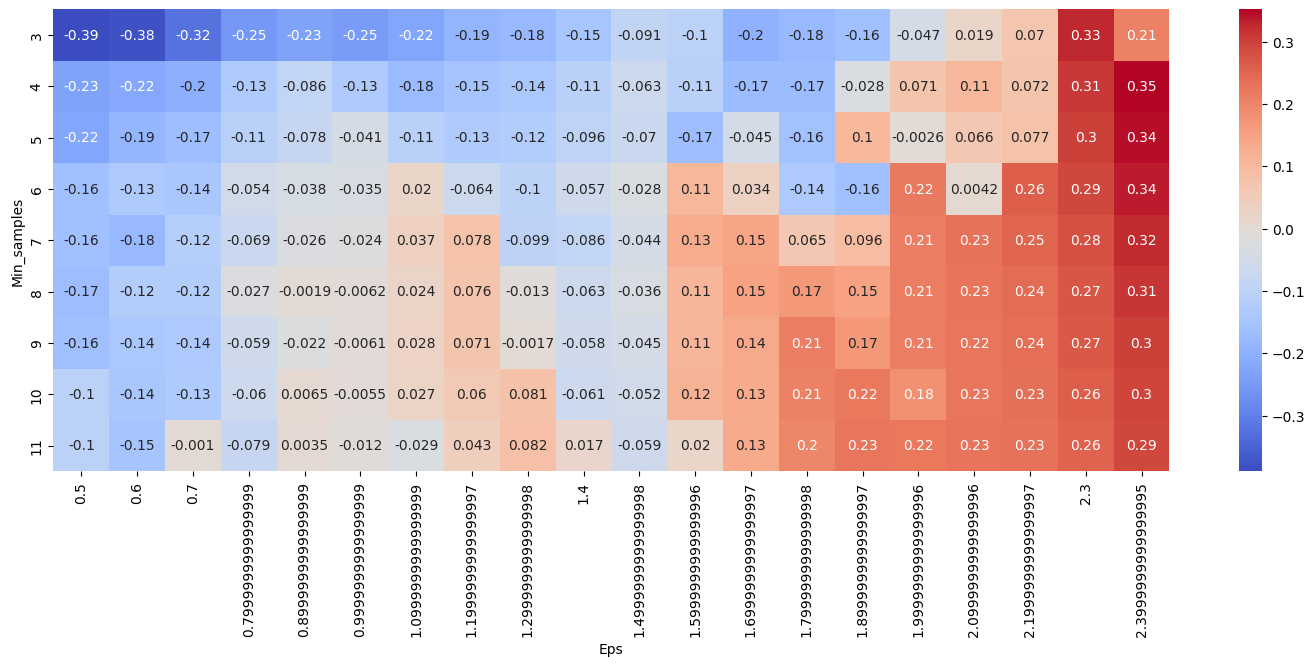

In [60]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

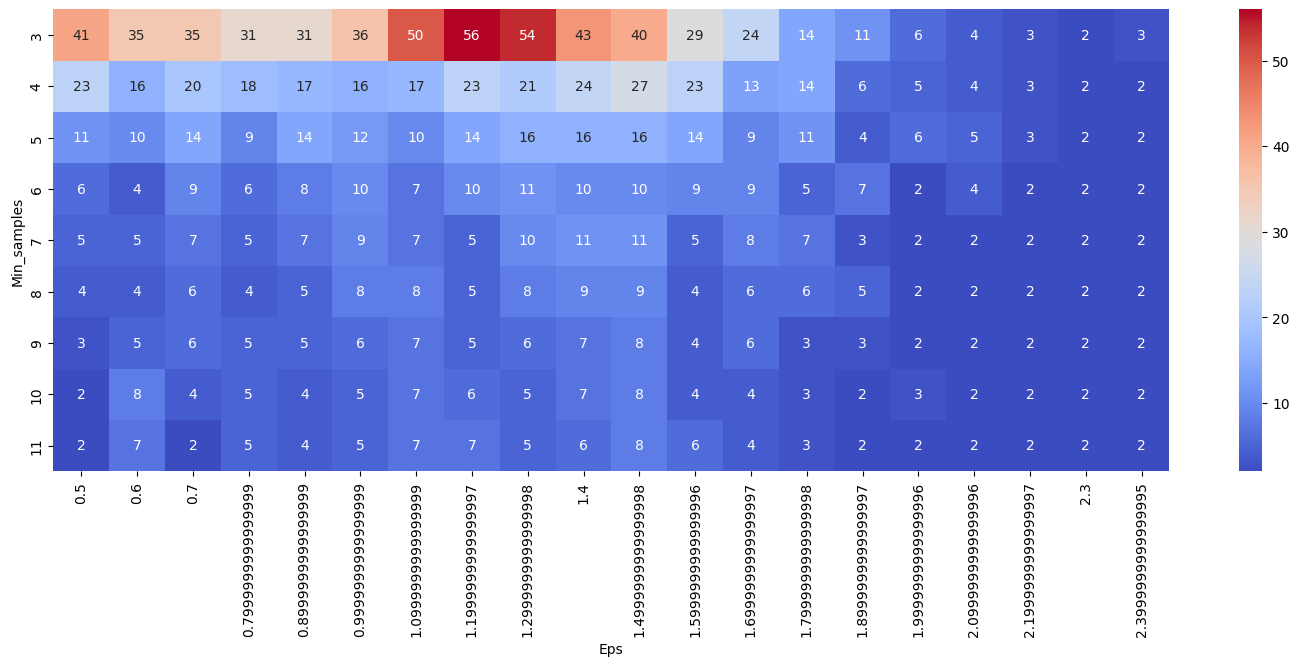

In [61]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [62]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_dbscan ))
df_country['dbscan_pca'] = y_dbscan

-0.19029430814104262


### Sin PCA

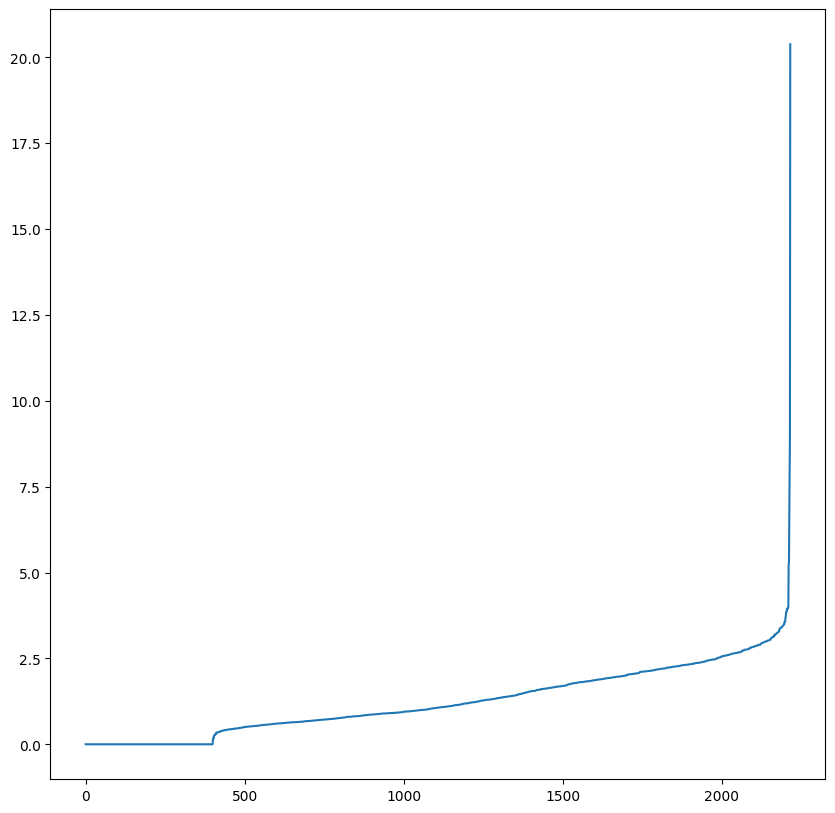

In [63]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [64]:
eps_values = np.arange(2, 3.0, 0.10)
min_samples = np.arange(3,12)

In [65]:
from itertools import product
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    try:
        sil_score.append(silhouette_score(df_country_scaled,y_dbscan))
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [66]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [67]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

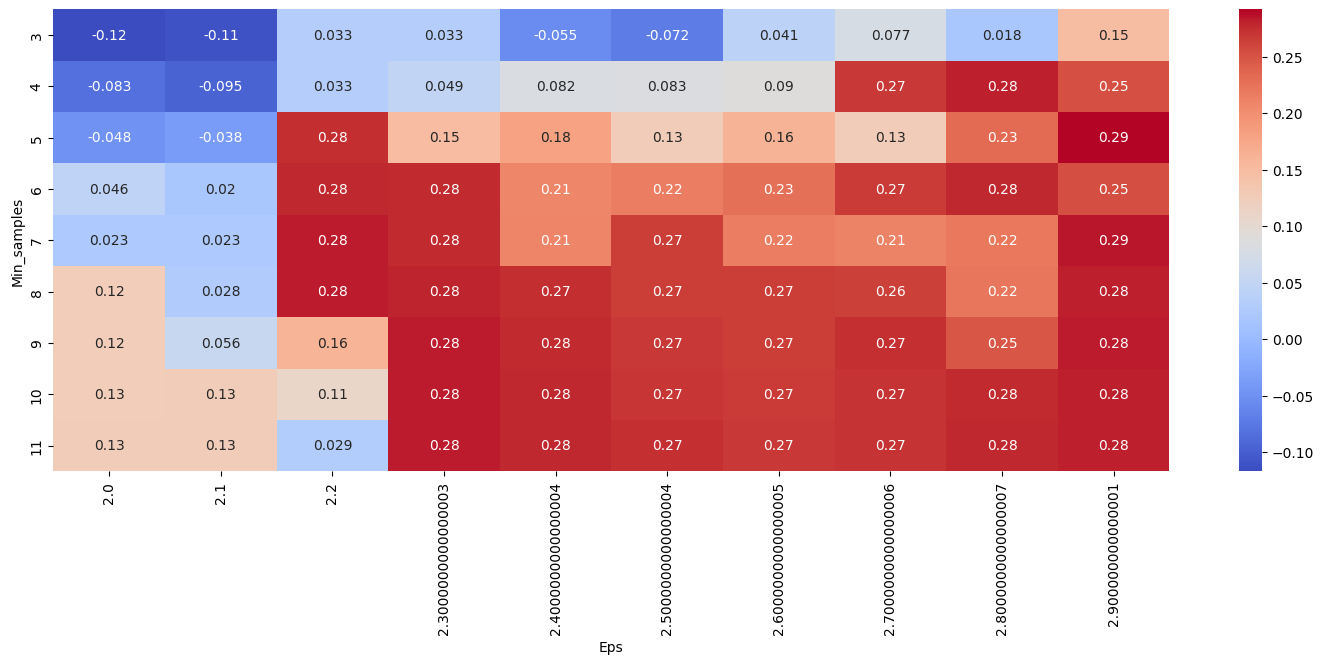

In [68]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

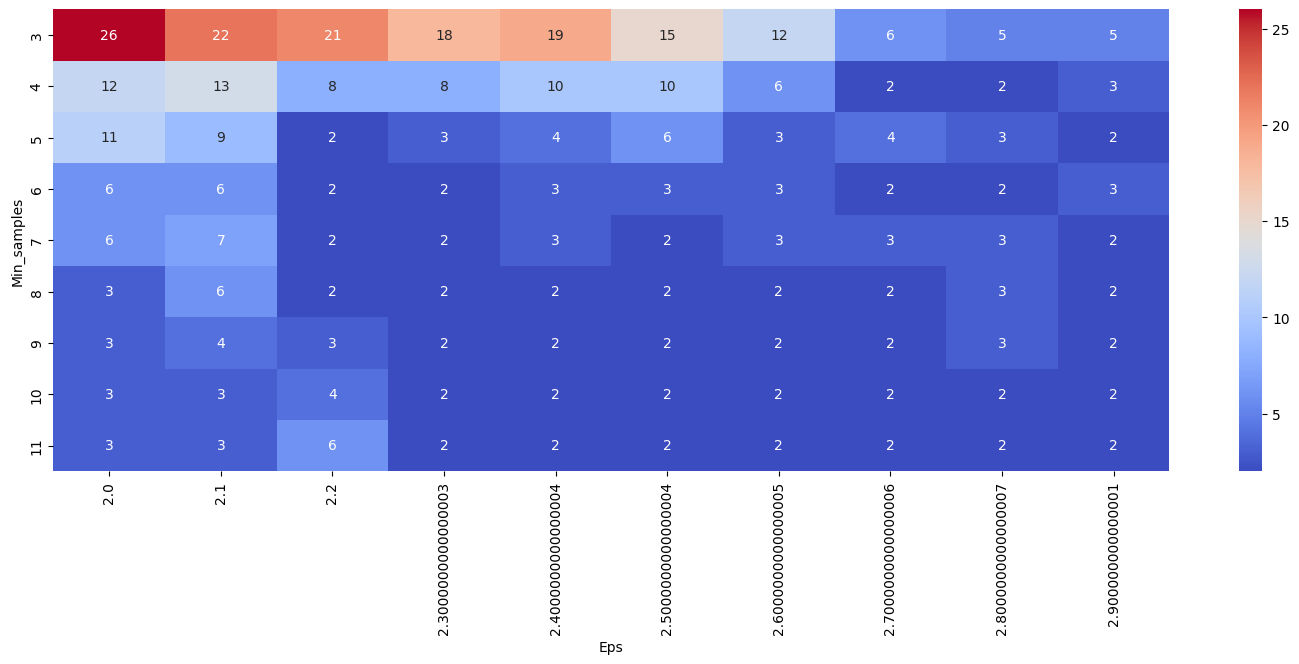

In [69]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [70]:
dbscan_train = DBSCAN(eps=2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_dbscan ))
df_country['dbscan_cluster'] = y_dbscan

-0.11694168026232303


In [71]:
df_country.head(5)

,Education,Marital_Status,Dt_Customer,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Graduation,Single,4/09/2012,1957,58138.0,0,0,58,635,88,...,8,10,4,7,1,0,1,0,-1,-1
1,Graduation,Single,8/03/2014,1954,46344.0,1,1,38,11,1,...,1,1,2,5,0,1,0,1,0,0
2,Graduation,Together,21/08/2013,1965,71613.0,0,0,26,426,49,...,8,2,10,4,1,0,1,0,-1,-1
3,Graduation,Together,10/02/2014,1984,26646.0,1,0,26,11,4,...,2,0,4,6,0,1,0,1,1,0
4,PhD,Married,19/01/2014,1981,58293.0,1,0,94,173,43,...,5,3,6,5,0,1,0,0,-1,0


## Evaluación de resultados

In [ ]:
df_country.columns
#utilizamos k_means_pca que fue donde tuvimos mejores resultados en el indice de silueta 0.32: print(silhouette_score(pca_data_standard, y))

Index(['Education', 'Marital_Status', 'Dt_Customer', 'Year_Birth', 'Income',
       'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'k_means_pca', 'k_means', 'hc_pca', 'hc', 'dbscan_pca',
       'dbscan_cluster'],
      dtype='object')

In [73]:
df_country[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'k_means_pca']]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,k_means_pca
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,1
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,1
2236,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,1
2238,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,1


In [74]:
sns.pairplot(data = df_country[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

Output hidden; open in https://colab.research.google.com to view.

In [75]:
df_country.head(5)

,Education,Marital_Status,Dt_Customer,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Graduation,Single,4/09/2012,1957,58138.0,0,0,58,635,88,...,8,10,4,7,1,0,1,0,-1,-1
1,Graduation,Single,8/03/2014,1954,46344.0,1,1,38,11,1,...,1,1,2,5,0,1,0,1,0,0
2,Graduation,Together,21/08/2013,1965,71613.0,0,0,26,426,49,...,8,2,10,4,1,0,1,0,-1,-1
3,Graduation,Together,10/02/2014,1984,26646.0,1,0,26,11,4,...,2,0,4,6,0,1,0,1,1,0
4,PhD,Married,19/01/2014,1981,58293.0,1,0,94,173,43,...,5,3,6,5,0,1,0,0,-1,0


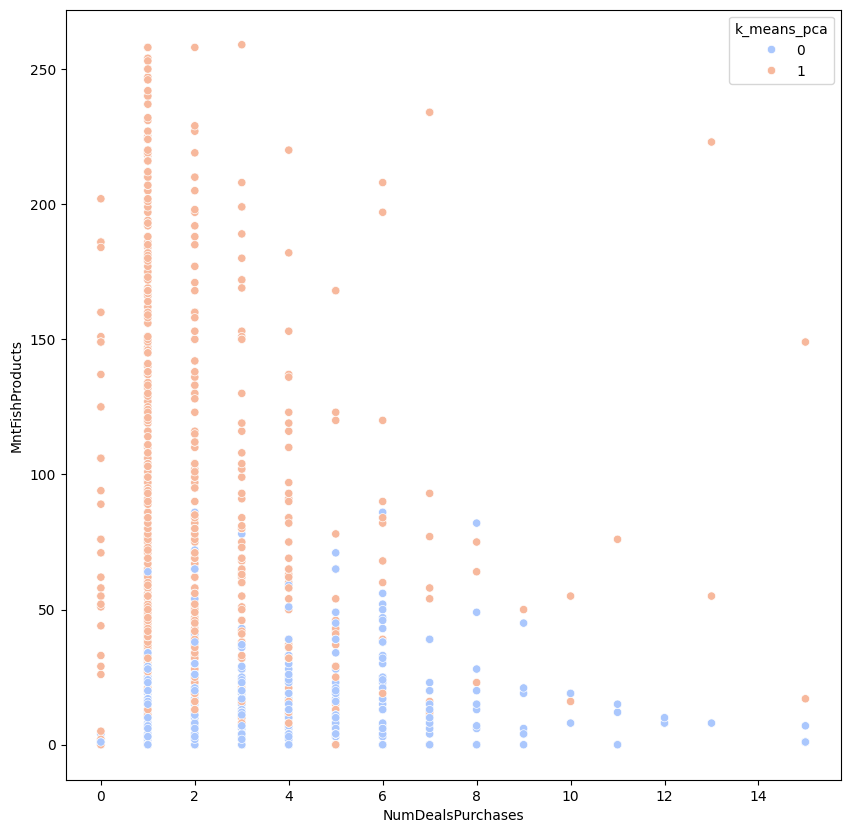

In [76]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_country, x='NumDealsPurchases', y='MntFishProducts',hue='k_means_pca', palette='coolwarm')
plt.show()

In [83]:
df_country[df_country['k_means_pca']==1] #aqui podemos escoger el numero de cluster de la grafica 0,1,2,3 y analizar

,Education,Marital_Status,Dt_Customer,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Graduation,Single,4/09/2012,1957,58138.0,0,0,58,635,88,...,8,10,4,7,1,0,1,0,-1,-1
2,Graduation,Together,21/08/2013,1965,71613.0,0,0,26,426,49,...,8,2,10,4,1,0,1,0,-1,-1
5,Master,Together,9/09/2013,1967,62513.0,0,1,16,520,42,...,6,4,10,6,1,0,0,0,2,0
6,Graduation,Divorced,13/11/2012,1971,55635.0,0,1,34,235,65,...,7,3,7,6,1,0,0,0,-1,0
12,Graduation,Divorced,15/11/2013,1959,63033.0,0,0,82,194,61,...,3,4,8,2,1,0,1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,Master,Single,21/08/2012,1970,44802.0,0,0,71,853,10,...,9,4,12,8,1,0,0,0,-1,-1
2233,Graduation,Together,2/06/2013,1977,666666.0,1,0,23,9,14,...,3,1,3,6,1,0,1,0,-1,-1
2235,Graduation,Married,13/06/2013,1967,61223.0,0,1,46,709,43,...,9,3,4,5,1,0,1,0,-1,-1
2237,Graduation,Divorced,25/01/2014,1981,56981.0,0,0,91,908,48,...,2,3,13,6,1,0,1,0,-1,-1
